# Bonus Task: PyTorch Digits Example
This example classifies the digit dataset using a neural net.

### 0. Preamble

In [1]:
import numpy as np
import torch
import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd

torch.manual_seed(1)
np.random.seed(1)

In [2]:
if(torch.cuda.is_available()):
  processing_chip = "cuda:0"
  print(f"{torch.cuda.get_device_name(0)} available")
else:
  processing_chip = "cpu"
  print("No GPU available")

device = torch.device(processing_chip)
device

No GPU available


device(type='cpu')

### 1. Data Preperation

In [3]:
data = pd.read_csv("../data/digits.csv")
X = data.drop(["label"], axis=1).values
y = data["label"].values

In [4]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
train_x = torch.Tensor(train_X).float().to(device)
test_x = torch.Tensor(test_X).float().to(device)
train_y = torch.Tensor(train_y).long().to(device)
test_y = torch.Tensor(test_y).long().to(device)

### 2. Model definition 


In [6]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.hidden1 = nn.Linear(64, 5)
    self.hidden2 = nn.Linear(5, 7)  
    self.output = nn.Linear(7, 10)

  def forward(self, x):
    z = F.relu(self.hidden1(x))
    z = F.relu(self.hidden2(z))
    z = self.output(z)  # no softmax. see CrossEntropyLoss() 
    return z

### 3. Model Training

In [7]:
# create network, move it to device and set it to training-mode
net = Net().to(device)
net.train()

# define the parameters for training
no_epochs = 500
learning_rate = 0.04
loss_func = nn.CrossEntropyLoss()  # applies softmax() internally
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

print("\nStarting training ")

train_losses = []
for epoch in range(0, no_epochs):

  optimizer.zero_grad()
  output = net(train_x)

  loss = loss_func(output, train_y)
  loss.backward()
  optimizer.step()

  train_losses.append(loss.item())
  
  if epoch % 10 == 0:
    print(f"Loss in epoch {epoch} is {loss.item()}")

print("Done training ")


Starting training 
Loss in epoch 0 is 2.483743906021118
Loss in epoch 10 is 2.1807913780212402
Loss in epoch 20 is 2.01027774810791
Loss in epoch 30 is 1.8581128120422363
Loss in epoch 40 is 1.6804239749908447
Loss in epoch 50 is 1.536109209060669
Loss in epoch 60 is 1.4206674098968506
Loss in epoch 70 is 1.3116875886917114
Loss in epoch 80 is 1.250049352645874
Loss in epoch 90 is 1.159900426864624
Loss in epoch 100 is 1.100775122642517
Loss in epoch 110 is 1.0240031480789185
Loss in epoch 120 is 0.9701412916183472
Loss in epoch 130 is 0.8882776498794556
Loss in epoch 140 is 0.844831645488739
Loss in epoch 150 is 0.7773175835609436
Loss in epoch 160 is 0.7421870827674866
Loss in epoch 170 is 0.6767224073410034
Loss in epoch 180 is 0.7762898802757263
Loss in epoch 190 is 0.5730279684066772
Loss in epoch 200 is 0.5403565764427185
Loss in epoch 210 is 0.5515636801719666
Loss in epoch 220 is 0.5390214920043945
Loss in epoch 230 is 0.48912903666496277
Loss in epoch 240 is 0.471425235271453

Text(0, 0.5, 'loss')

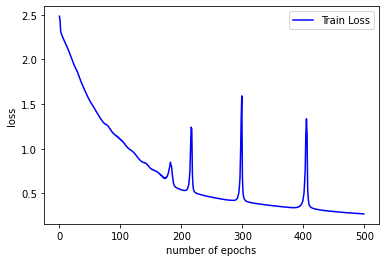

In [8]:
  fig = plt.figure()
  plt.plot(range(0, no_epochs), train_losses, color='blue')
  plt.legend(['Train Loss'], loc='upper right')
  plt.xlabel('number of epochs')
  plt.ylabel('loss')

### 4. Model Evaluation

In [9]:
net.eval() # set network to evaluation mode
y_pred = net(test_x)
predicted = torch.argmax(y_pred.data, 1)
correct = (predicted == test_y).sum().item()
print(f"Accuarcy is {100. * correct / len(test_x)}%")

Accuarcy is 89.44444444444444%
